In [1]:
from google.colab import files
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import io
github_raw_loc = 'https://raw.githubusercontent.com/plotly/datasets/master/2014_apple_stock.csv' # Raw link should be public
df_titanic = pd.read_csv(io.BytesIO(uploaded['titanic_train.csv']))
# df_titanic_gender = pd.read_csv(io.BytesIO(uploaded['titanic_gender.csv']))

# df_titanic = pd.read_csv(github_raw_loc)


In [3]:
df_titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(df_titanic.columns.values)
print('\n','#'*40)
print(df_titanic.info())
print('\n','#'*40)
print(df_titanic.shape)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']

 ########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None

 ########################################
(891, 12)


In [0]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Correlation matrix

Simple terms shows how close two variables are to having a linear relationship between one another

*   The higher the number the better.
*   Darker blocks have the highest co relation

Eg :- Pclass and fare represent a direct relationship

We will look into Pclass,age,gender,SibSp,Parch and try to check if assumption is correct or not

Lastly will check how fare corresponds to survival rate




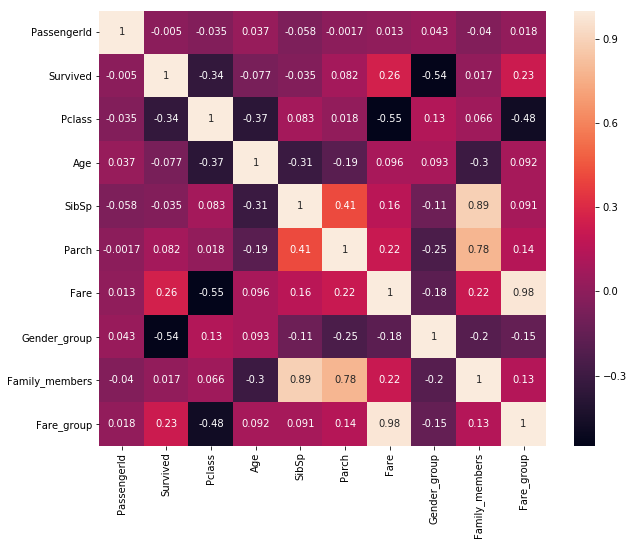

In [62]:
# import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 75
# for higher quality

df_titanic['Gender_group'] = df_titanic['Sex'].apply(lambda x: 1 if(x == 'male') else 0)
plt.figure(figsize=(10,8))
sns.heatmap(df_titanic.corr(),annot = True)

# Survival rate based on gender


We conclude that females have a better survival rate than men

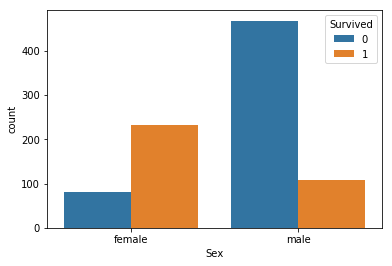

In [63]:
data = df_titanic.groupby(['Sex','Survived']).size().reset_index(name='count')
# print(data.head())
sns.barplot(data=data,x='Sex',y='count',hue = 'Survived')
# sns.countplot(data=data,x='Sex',y='Survived',hue='0')

# Survival rate based on Age group

Over here first mean of age was calculated

Then we replaced age NAN values with mean of the values

Then we calulated out age group people between age 20 to 30 will get placed in group 2 and 30 to 40 in group 3 and so on.

Lastly, we generated graph with survival rate

Observation - 


*   Group 0 has the highest survival rate
*   Group 2 129 survived but 268 dint
*   Survival rate decreased with age


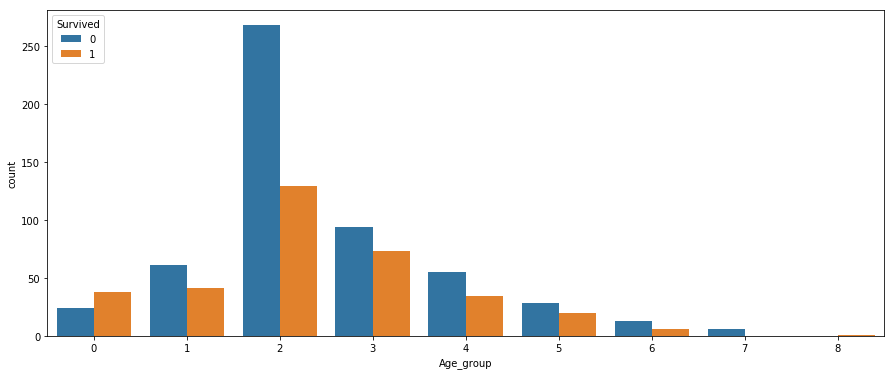

In [64]:
# gender

def age_simple(age):  
  return int(age/10)

mean_age = df_titanic['Age'].median()
df_titanic['Age'] = df_titanic['Age'].fillna(value=mean_age)
#data = df_titanic['Age','Survived'].apply(age_simple,axis = 1)#.reset_index(name = 'group_age') #.groupby('group_age').size()
df_titanic['Age_group'] = df_titanic['Age'].apply(age_simple)
data = df_titanic.groupby(['Age_group','Survived']).size().reset_index(name = 'count')
# print(data)
plt.figure(figsize=(15,6))
sns.barplot(data=data,x='Age_group',y='count',hue='Survived')

# Survival rate based on P class

Observation - better(or lower) Pclass had better survival rate

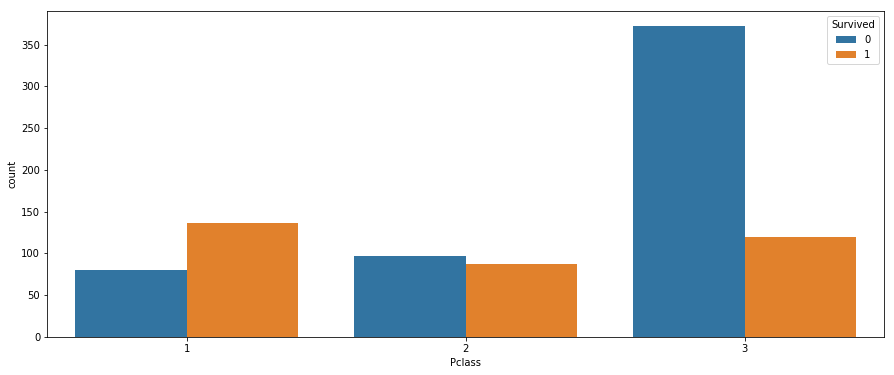

In [65]:
data = df_titanic.groupby(['Pclass','Survived']).size().reset_index(name='count')
plt.figure(figsize=(15,6))
sns.barplot(data=data,x='Pclass',y='count',hue='Survived')

# Survival rate based on family count


Creating a attribute survival rate which is sum of parent count + sibling count

*   People with atleast one family member had better survival rate
*   As the number of memebers grew survival rate lowered

We will use this attribute for modeling


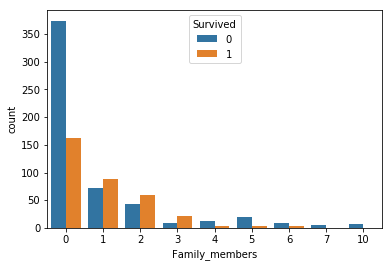

In [66]:

df_titanic['Family_members'] = df_titanic['Parch'] + df_titanic['SibSp']
data = df_titanic.groupby(['Family_members','Survived']).size().reset_index(name = 'count')
# print(data)
sns.barplot(data = data,x='Family_members',y='count',hue='Survived')

# Survival rate based on Fare price

*   Higher the price better the survival rate



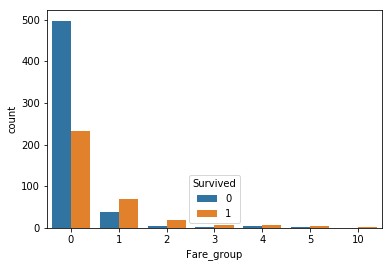

In [67]:
#data = df_titanic.groupby(['Fare','Survived']).size().reset_index(name = 'count').sort_values(by = 'Fare',ascending = False)

df_titanic['Fare_group'] = df_titanic['Fare'].apply(lambda x : int(x/50)) #.reset_index().groupby('Fare').size()
data = df_titanic.groupby(['Fare_group','Survived']).size().reset_index(name = 'count') #.sort_values(by = 'Fare_group',ascending = False)
sns.barplot(data = data,x='Fare_group',y='count',hue='Survived')

# Survival rate based on Embarked

*  C had better chance of survival

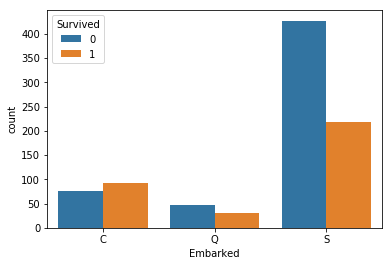

In [68]:
# print(df_titanic['Embarked'].unique())
frq_emb = df_titanic['Embarked'].mode()[0]
df_titanic['Embarked'] = df_titanic['Embarked'].fillna(value = frq_emb)
data = df_titanic.groupby(['Embarked','Survived']).size().reset_index(name = 'count')
sns.barplot(data = data,x='Embarked',y='count',hue='Survived')

# Attributes that will be used of model

1.	PassengerId -> nope
2.	Survived -> y
3.	Pclass -> yes 
4.	Name -> nope
5.	Sex -> updated to Gender_group
6.	Age -> updated to Age_group
7.	SibSp -> updated to Family_members
8.	Parch -> updated to Family_members
9.	Ticket -> nope
10.	Fare -> nope
11.	Cabin -> nope
12.	Embarked -> yes
13.	Gender_group -> yes
14.	Age_group -> yes
15.	Family_members -> yes
16.	Fare_group -> yes

In [106]:
df = df_titanic[['Pclass','Embarked','Gender_group','Age_group','Family_members','Fare_group','Survived']]
df.head(5)

,Pclass,Embarked,Gender_group,Age_group,Family_members,Fare_group,Survived
0,3,S,1,2,1,0,0
1,1,C,0,3,1,1,1
2,3,S,0,2,0,0,1
3,1,S,0,3,1,1,1
4,3,S,1,3,0,0,0


In [0]:
nan_check = df.Fare_group.isnull()
nan_check[nan_check == True]

In [0]:
df.shape

# Prerequisite

Only need to take care of Embarked which has string value 
We will label encode then one hot encode

In [111]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
import numpy as np
np.set_printoptions(threshold=np.inf)

l_encoder = LabelEncoder()
df['Embarked'] = l_encoder.fit_transform(df['Embarked'])
one_encode = OneHotEncoder(categorical_features=[1],sparse = False)
output = one_encode.fit_transform(df)[:,1:]
X = output[:,:-1]
y = output[:,-1:]
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(output[:5,:])

[[0. 1. 3. 1. 2. 1. 0. 0.]
 [0. 0. 1. 0. 3. 1. 1. 1.]
 [0. 1. 3. 0. 2. 0. 0. 1.]
 [0. 1. 1. 0. 3. 1. 1. 1.]
 [0. 1. 3. 1. 3. 0. 0. 0.]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: 

# Splitting data into training and test

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [119]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train,y_train)

score = model.score(X_test,y_test)
print(score)

0.8100558659217877


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
c_out = confusion_matrix(y_test, y_pred)
print(c_out)

[[93 12]
 [19 55]]
